In [2]:
# with all production modes

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/python/')
from helper import make_datacard, make_datacard_2sig, weight_calc
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
a = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.22/02
3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [3]:
fpath =OrderedDict()
tree = OrderedDict()

prod = ['ggH']
decay = 'bbbb'

category = 0

mass = [15, 40, 55]

OLD_CTAU = np.array([100, 1000, 10000, 100000])#in mm


data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v5/v95/normalized/'

fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root'
mc_path = {}
analyzer_version = 'v1/v86/'

analyzer_version = 'v1/v94/'
analyzer_version = 'v1/v96/'
analyzer_version = 'v1/v98/'


mc_path['ggH'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/'+analyzer_version+'/normalized/'

for m in mass:
    for ct in OLD_CTAU:
        for p in prod:
            key = 'MC_'+p+'_'+str(m)+'_'+str(ct)                       
            fpath[key] = mc_path[p]+p+'_HToSSTo'+decay+'_MH-125_MS-'+str(m)+'_ctau-'+str(ct)+'_TuneCP5_13TeV-powheg-pythia8_41530pb_weighted.root'




NEvents = {}
NEvents_genweight = {}
for k,v in fpath.items():
#     print(k,v)
#     if 'data' in k:continue
    root_dir = uproot.open(v) 
    if not root_dir: 
        print(k, "zombie")
        continue
    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    
    w = tree[k]["weight"].array()
    if not 'data' in k: 
        print(k, root_dir['NEvents']._fEntries)


MC_ggH_15_100 1983000.0
MC_ggH_15_1000 1957000.0
MC_ggH_15_10000 2060000.0
MC_ggH_15_100000 1938999.0
MC_ggH_40_100 1954000.0
MC_ggH_40_1000 1935000.0
MC_ggH_40_10000 1992999.0
MC_ggH_40_100000 1997000.0
MC_ggH_55_100 2005000.0
MC_ggH_55_1000 2036000.0
MC_ggH_55_10000 1986999.0
MC_ggH_55_100000 1938000.0


# nCsc with different hit vetoing

In [11]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50
cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1
weight = {}
weight_event = {}
weight_ctau = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
gLLP_csc = {}
cscClusterSize = {}
cscClusterTime = {}
nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
cscRechitClusterTimeDiff = {}
cscRechitCluster_match_gLLP = {}
higgsPtWeight = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterXYSpread = {}
cscRechitClusterNStation = {}
cscRechitClusterAvgStation = {}
cscRechitClusterEtaPhiSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterPhi = {}
cscClusterJetVetoPt = {}
cscRechitClusterEta = {}
cscRechitClusterZSpread = {}
cscRechitClusterNStation10  = {}
cscRechitClusterAvgStation10 = {}
cscRechitClusterMaxStationRatio = {}
cscRechitClusterNChamber = {}
cscRechitClusterMet_dPhi = {}
jetMet_dPhiMin30 = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
nCscRings = {}
nDtRings = {}
bdt_score = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
bdt_sel = {}
sf_facScaleUp = {}
sf_facScaleDown = {}
sf_renScaleUp = {}
sf_renScaleDown = {}
sf_facRenScaleUp = {}
sf_facRenScaleDown = {}
metSF = {}
legend = {}
runNum = {}
lumiSec = {}
evtNum = {}
ggZH_weight = {}
higgsEta = {}
higgsPt = {}
dphiMetHEM_cluster = {}
w_all = {}
w_EE = {}
EE_prefiring ={}
nJets = {}
metXYCorr = {}
metPhiXYCorr = {}

metEENoise = {}

metPhiEENoise = {}


dphiMetEENoise_cluster = {}
cluster_index ='3'

for k in list(tree.keys()):
#     if 'data' in k:continue
########### SELECTION: CLUSTERS ############
    T = tree[k]

    sel_rechitcluster = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 2.0
    
    me1112_veto = 0
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpread') <= 20)
    if 'oot' in k:
        sel_rechitcluster = np.logical_and(sel_rechitcluster,  T.array('cscRechitCluster' + cluster_index + 'TimeTotal') < -12.5)
    else:
        sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') < JET_PT_CUT)

        sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < MUON_PT_CUT)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeTotal') < 12.5, T.array('cscRechitCluster' + cluster_index + 'TimeTotal') > -5.0))
    sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') < JET_PT_CUT)
    sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < MUON_PT_CUT)
    if 'MC' in k:
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc'))



########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )
    hem = np.logical_and(T.array('jetEta') > -3, T.array('jetEta') < -1.3)
    hem = np.logical_and(hem, T.array('jetPhi') < -0.87)
    hem = np.logical_and(hem, T.array('jetPhi') > -1.57)



########### SELECTION: EVENTS ############

    sel_ev[k] = T.array('METNoMuTrigger')
#     sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metXYCorr') >= 200)

    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') >= 200)




    sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == category)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('nLeptons') == 0)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() == 1)


    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)

    w = T.array('weight')*T.array('pileupWeight')*T.array('higgsPtWeight')*T.array('metSF')
    
    if 'MC' in k:
        sel_ev[k] = np.logical_and(sel_ev[k], np.sum(T.array('gLLP_csc'),axis = 1) > 0)

########### BRANCHES ############

   ##### event variables ##### 
    
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]


    ##### bdt variables ####
    
    ##### bdt variables ####
    cscRechitClusterNStation10[k] = T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()

    
    if len(cscRechitClusterAvgStation10[k])>0:
        
        if cut_based:     
            if cut_based_version == 'v4':
                cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
                cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
                cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
                cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
                cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
                bdt_sel[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
            else:
                print("CUT BASED ERROR")
            if 'vr' in k:
                bdt_sel[k] = np.logical_not(bdt_sel[k])
                
        else:
            print('bdt based')
            if k == 'data_oot_sr':
                bdt_sel[k] = bdt_score[k] >= BDT_CUT
            elif 'vr' in k:
                bdt_sel[k] = bdt_score[k] < BDT_CUT            
            elif k == 'data':
                bdt_sel[k] = bdt_score[k] < BDT_CUT 
            else:
                bdt_sel[k] = bdt_score[k] >= BDT_CUT
        print("effiency",np.count_nonzero(bdt_sel[k])/len(bdt_sel[k]))

#         dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetXYCorr_dPhi'))[sel_rechitcluster][sel_ev[k]][:,0].flatten()[bdt_sel[k]]
#         dphiMetEENoise_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))[sel_rechitcluster][sel_ev[k]][:,0].flatten()[bdt_sel[k]]


        dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))[sel_rechitcluster][sel_ev[k]][:,0].flatten()[bdt_sel[k]]



        jetMet_dPhiMin30[k] = T.array('jetMet_dPhiMin')[sel_ev[k]][bdt_sel[k]]
        if 'data' in k:metSF[k]= np.ones(dphiMet_cluster[k].shape, dtype=bool)
        else: metSF[k] = np.abs(T.array('metSF'))[sel_ev[k]][bdt_sel[k]]


        higgsPt[k] = T.array('gHiggsPt')[sel_ev[k]][bdt_sel[k]]
        higgsEta[k] = T.array('gHiggsEta')[sel_ev[k]][bdt_sel[k]]

        weight[k] = (T.array('weight')*T.array('pileupWeight')*T.array('higgsPtWeight')*T.array('metSF'))[sel_ev[k]][bdt_sel[k]]
        EE_prefiring[k] = T.array('EE_prefiring')[sel_ev[k]][bdt_sel[k]]
        metXYCorr[k] = T.array('metXYCorr')[sel_ev[k]][bdt_sel[k]]
        metPhiXYCorr[k] = T.array('metPhiXYCorr')[sel_ev[k]][bdt_sel[k]]


        metEENoise[k] = T.array('metEENoise')[sel_ev[k]][bdt_sel[k]]
        metPhiEENoise[k] = T.array('metPhiEENoise')[sel_ev[k]][bdt_sel[k]]



        nJets[k] = np.array(sel_jet.sum())[sel_ev[k]][bdt_sel[k]]

        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
        nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k][:,0]
        lumiSec[k] = T.array('lumiSec')[sel_ev[k]][bdt_sel[k]]
        runNum[k] = T.array('runNum')[sel_ev[k]][bdt_sel[k]]
        evtNum[k] = T.array('evtNum')[sel_ev[k]][bdt_sel[k]]
#         print(np.sum(weight[k]),np.sum(weight[k]*ggZH_weight[k]))
        
    else:
        dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'Met_dPhi'))[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        weight[k] = (T.array('weight')*T.array('pileupWeight')*T.array('higgsPtWeight'))[sel_ev[k]]
        if 'data' in k:weight[k] = np.ones(weight[k].shape, dtype=bool)
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev[k]]
        nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k][:,0]
        if 'data' in k:metSF[k]= np.ones(dphiMet_cluster[k].shape, dtype=bool)
        else: metSF[k] = np.abs(T.array('metSF'))[sel_ev[k]]
        lumiSec[k] = T.array('lumiSec')[sel_ev[k]]
        runNum[k] = T.array('runNum')[sel_ev[k]]
        evtNum[k] = T.array('evtNum')[sel_ev[k]]
        print("no BDT applied")

effiency 0.2985971943887776
effiency 0.872093023255814
effiency 0.9273104880581516
effiency 0.9245283018867925
effiency 0.8536585365853658
effiency 0.6666666666666666
effiency 0.9100775193798449
effiency 0.919629057187017
effiency 0.8701298701298701
no BDT applied
effiency 0.8270440251572327
effiency 0.9222222222222223
effiency 0.9491525423728814


data 0.0
data 0.0
MC_ggH_15_100 0.0
MC_ggH_15_100 0.0
MC_ggH_15_1000 0.0
MC_ggH_15_1000 0.0
MC_ggH_15_10000 0.0
MC_ggH_15_10000 0.0
MC_ggH_15_100000 0.0
MC_ggH_15_100000 0.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


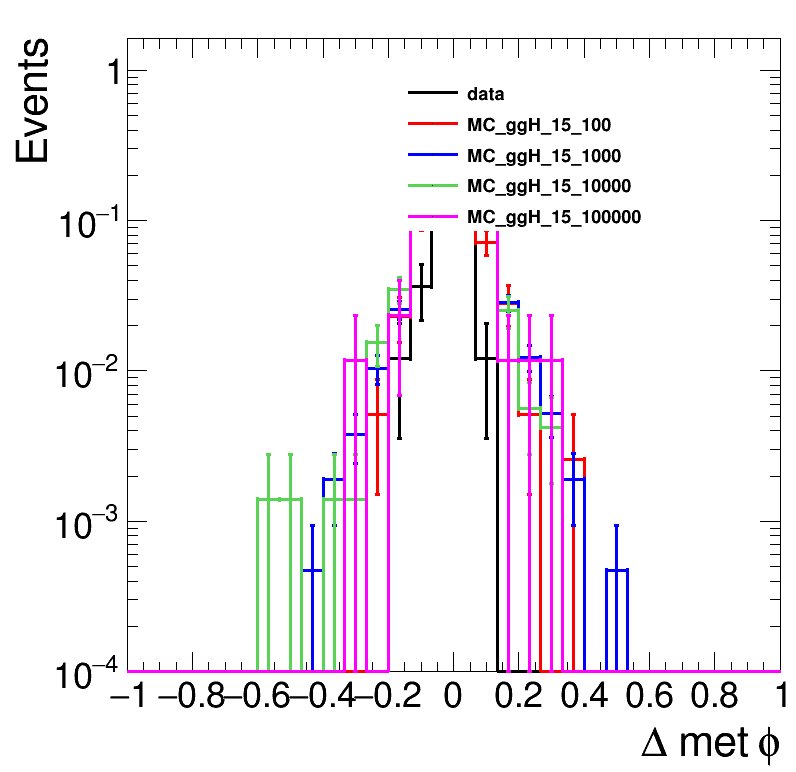

In [13]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot




leg = rt.TLegend(0.5,0.7,0.85,0.9)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
legend={
    'ggh': 'ggH',
    'VBFH': 'ggH + VBF',
    'allProd': 'All production modes'
}

c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# ctaus_m = ctaus/1000
h = {}
var = [dphiMet_cluster, metXYCorr, metPhiXYCorr]
var2 = [dphiMetEENoise_cluster, metEENoise, metPhiEENoise]




name = ['dphiMet_cluster', 'met', 'metphi']
bins = [[30,-1,1], [20,-150,150],[30,-1,1]]

xaxis  = ['#Delta (#Delta#phi(cluster, MET))','#Delta MET [GeV]', '#Delta met #phi']
for j in range(len(var)):
    if not j == 2:continue
    for i, k in enumerate(tree.keys()):
    
        if k == 'MC_ggH_55_100':continue
        if len(var[j][k])==0:continue
#         if not k == 'MC_ggH_15_1000':continue
        if not '15' in k and not 'data' in k:continue
#         if not 'data' in k:continue
        if j ==0: cond = metXYCorr[k]>=200
        else: cond = metXYCorr[k]>=0
    
        h[k] = create_TH1D(var[j][k][cond]-var2[j][k][cond],axis_title=[xaxis[j], 'Events'],binning = bins[j])


    
        h[k+'EE'] = create_TH1D(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)],axis_title=[xaxis[j], 'Events'],binning = bins[j])
        if j == 0:
            print(k, np.count_nonzero(np.abs(var[j][k][cond])<0.75)/len(np.abs(var[j][k][cond])))
            print(k, np.count_nonzero(np.abs(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)])<0.75)/len(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)]))
        elif j ==1:
            print(k, np.count_nonzero(np.abs(var[j][k][cond])>=130)/len(np.abs(var[j][k][cond])))
            print(k, np.count_nonzero(np.abs(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)])>=130)/len(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)]))
        elif j == 2:
            print(k, np.count_nonzero(np.abs(var[j][k][cond])>=200)/len(np.abs(var[j][k][cond])))
            print(k, np.count_nonzero(np.abs(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)])>=200)/len(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)]))
        else:
            print(k, np.count_nonzero(np.abs(var[j][k][cond])>=1)/len(np.abs(var[j][k][cond])))
            print(k, np.count_nonzero(np.abs(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)])>=1)/len(var[j][k][np.logical_and(cond, EE_prefiring[k]==1)]))


        h[k].SetLineColor(std_color_list[i])
        leg.AddEntry(h[k],k)
        h[k].SetLineWidth(3)
        h[k].Scale(1./h[k].Integral())

        h[k].SetMinimum(0.0001)
        h[k].GetXaxis().SetTitleOffset(1)

        h[k].Draw("same hist E1")

#         c = make_ratio_plot([h[k], h[k+'EE']], fit = False, logy=False, in_tags = ["nominal","pre-firing test"],ratio_index = 0,\
#                             ratio_bounds = [0.7,1.2], draw_opt = ['E1','E1']) 

        leg.Draw()
        c.SetLogy()
        c.Draw()
#         output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/EE_prefiring/'


#         if not os.path.isdir(output_dir):os.makedirs(output_dir)
#         c.SaveAs(output_dir+k+'_'+name[j]+'.png')
#         c.SaveAs(output_dir+k+'_'+name[j]+'.C')




# signal yield summary table

In [12]:

ctaus = [ '100', '1000','10000','100000' ]
# ctaus = ['500', '1000', '10000', '100000', '1000000']

# ctaus = [ '10000','100000' ]

# ctaus = [  '1000' ]


# ctaus = [  '10000','100000' ]


BR = 0.01
N_RECHIT_CUT = 130
DPHI_CUT = 0.75



var = dphiMet_cluster
# DPHI_CUT = 0.6      
# var = jetMet_dPhiMin30
for N_RECHIT_CUT in np.arange(60,220,10):
    if not N_RECHIT_CUT==130:continue
    total_sig = 0
    for m in mass:
#         if not m == 55:continue
        signal_rate = []
        unc_rate = []
        signal_unc = []
        denominator = []
        for ct in ctaus:   
#             if not ct == '1000':continue
            signal = 0
            total = 0
            sig_unc = 0
            shape_unc_temp = 0
            ctf = int(ct)
            if ctf < OLD_CTAU[0]:
                old_ctau_temp = np.array([OLD_CTAU[0]])
            else:
                for j, ct0 in enumerate(OLD_CTAU):
                    if ct0 == ctf: 
                        old_ctau_temp = np.array([int(ctf)])
                        break

                    elif ct0 > ctf:
                        old_ctau_temp = np.array([OLD_CTAU[j-1], OLD_CTAU[j]])
                        old_ctau_temp = np.array([OLD_CTAU[j]])
                        break
                    if j == len(OLD_CTAU)-1: 
                        old_ctau_temp = np.array([OLD_CTAU[j]])
#             print(ct,old_ctau_temp)

            weight_sum = 0
            weight_len = 0
            for j,ct0 in enumerate(old_ctau_temp):
#                 if VBFH: prods = ['ggH', 'VBFH']
#                 else: prods = ['ggH']
                prods = ['ggH']
                for p in prods:
#                 for p in ['','LL','QQ','NuNu']:
#                     production = 'ttH'
                    k = 'MC_'+p+'_'+str(m)+'_'+str(ct0)+''
#                         k = 'MC_'+'ggZH'+'_'+str(m)+'_'+str(ct0)+p


                    T = tree[k]
                    if np.count_nonzero(sel_ev[k]) == 0: continue
                    gLLP_ctau = np.sum(T.array('gLLP_ctau'), axis = 1)[sel_ev[k]][bdt_sel[k]]
                    if len(gLLP_ctau) == 0: continue
                    weight_ctau = weight_calc(gLLP_ctau, float(ct)/10, old_ctau_temp/10) # convert everything to cm
                    w = weight[k]

                    a = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= N_RECHIT_CUT, np.abs(var[k]) >= DPHI_CUT)
                    b = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < N_RECHIT_CUT, np.abs(var[k]) >= DPHI_CUT)
                    c = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < N_RECHIT_CUT, np.abs(var[k]) < DPHI_CUT)
                    d = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= N_RECHIT_CUT, np.abs(var[k]) < DPHI_CUT)
                    cond = d
        

                    signal += np.sum(w[cond])
                    sig_unc +=np.sum(w[cond]*w[cond])
#                     total += w_EE[k]
#                     shape_unc_temp = (shape_unc_temp**2+np.sum(w[cond]*shape_unc[cond])**2)**0.5


            signal_rate.append(signal)
            signal_unc.append(sig_unc**0.5)
            unc_rate.append(shape_unc_temp)
            denominator.append(total)
        signal_rate = np.array(signal_rate)
        unc_rate = np.array(unc_rate)
        signal_unc = np.array(signal_unc)
        denominator = np.array(denominator)
#         print(N_RECHIT_CUT, '\t', signal_rate[0]*BR)
#         print(m,'GeV &', ' & '.join(map(str, [round(num,2) for num in signal_rate*BR])),'\\\\')
#         print(m,'GeV &', ' '.join(map(str, [round(num,4) for num in signal_rate*BR])),'\\\\')


#         print(m, '\t', '\t'.join(map(str, [round(num,2) for num in signal_unc*BR])))
        print(m, '\t', '\t'.join(map(str, [round(num,3) for num in signal_rate*BR])))
    
#         print(m, '\t', '\t'.join(map(str, [round(num,7) for num in signal_rate/denominator])))



#         print(m, '\t', '\t'.join(map(str, [round(num,2) for num in signal_unc/signal_rate])))


#         print(m, '\t'.join(map(str,[round(num,2) for num in unc_rate*BR]))) #signal mc relative uncertainty
        total_sig += np.sum(signal_rate)
# print(total_sig*BR)

#     print(m, '\t'.join(map(str,unc_rate/signal_rate))) #signal mc relative uncertainty



15 	 2.015	6.804	1.428	0.148
40 	 0.079	5.553	4.846	0.533
55 	 0.0	2.325	5.852	0.911


In [ ]:
15 	 0.0157823	0.0021215	0.0011596	0.0010274
40 	 0.0248379	0.0032727	0.0016081	0.0009395
55 	 nan	0.003328	0.001609	0.0011458